<a href="https://colab.research.google.com/github/valievav/ML-projects/blob/main/CNN_CIFAR10_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Rmtr9SY-4VQ

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns


# Load and explore data

In [2]:
# get data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
X_train[:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
# reshape to 1D array
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

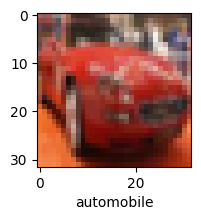

In [13]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 5)

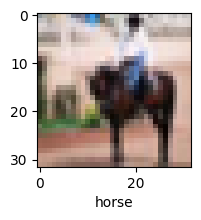

In [14]:
plot_sample(X_train, y_train, 11)

In [15]:
# normalize images from 0 to 1 (from 0 to 255)
X_train = X_train / 255.0
X_test = X_test / 255.0


# Create and train model

In [ ]:
# create ANN model (Artificial Neural Network)
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy',]
)

model.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 101ms/step - accuracy: 0.3049 - loss: 1.9315
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 278s 150ms/step - accuracy: 0.4222 - loss: 1.6339
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 116ms/step - accuracy: 0.4558 - loss: 1.5510
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 227s 132ms/step - accuracy: 0.4741 - loss: 1.4947
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 98ms/step - accuracy: 0.4960 - loss: 1.4343


In [ ]:
# get predictions
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]
print(f'Classification report: \n{classification_report(y_test, y_pred_classes)}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
Classification report: 
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1000
           1       0.56      0.68      0.62      1000
           2       0.36      0.38      0.37      1000
           3       0.40      0.19      0.25      1000
           4       0.55      0.20      0.29      1000
           5       0.38      0.44      0.41      1000
           6       0.40      0.74      0.52      1000
           7       0.49      0.61      0.55      1000
           8       0.66      0.57      0.61      1000
           9       0.62      0.49      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.47     10000
weighted avg       0.50      0.49      0.47     10000



<function matplotlib.pyplot.show(close=None, block=None)>

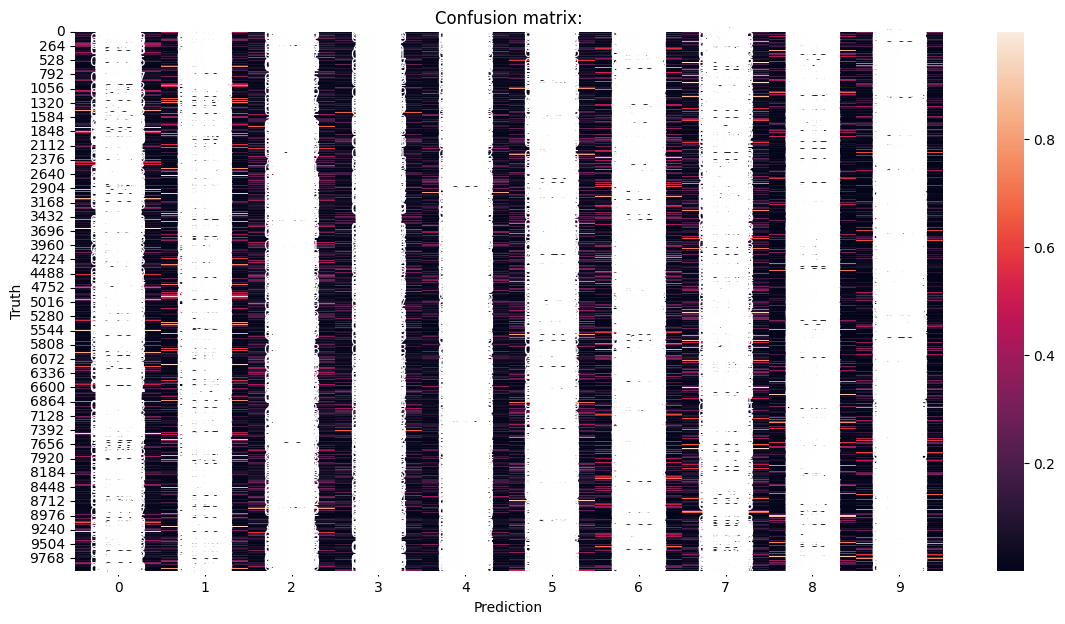

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix:')
plt.show


In [ ]:
# create CNN model (Convolutional Neural Network)
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # using sparse_categorical_crossentropy since labels are not one-hot encoded
    metrics=['accuracy',]
)

cnn_model.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 38ms/step - accuracy: 0.3852 - loss: 1.7059
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.5858 - loss: 1.1762
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6523 - loss: 1.0071
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.6801 - loss: 0.9212
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7100 - loss: 0.8405


In [ ]:
cnn_model.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6708 - loss: 0.9731


[0.9708652496337891, 0.6653000116348267]

In [ ]:
# get predictions
y_pred = cnn_model.predict(X_test)
y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


array([[1.5433220e-02, 3.4794473e-04, 1.0257555e-02, 7.6127064e-01,
        1.7193366e-04, 7.9942472e-02, 2.7834745e-03, 1.2762258e-03,
        1.2489422e-01, 3.6222427e-03],
       [2.0546990e-02, 9.2112720e-03, 7.7117011e-06, 1.2196176e-05,
        1.3364107e-06, 4.2601400e-07, 1.2991740e-07, 5.2122487e-06,
        9.6546382e-01, 4.7509489e-03],
       [3.5769567e-02, 5.1628493e-02, 1.2857855e-03, 1.4155683e-02,
        1.4203980e-03, 7.9062145e-04, 4.3018867e-04, 6.7026133e-04,
        8.4469110e-01, 4.9157917e-02],
       [7.6352847e-01, 6.6134208e-03, 2.2329569e-02, 2.0663037e-03,
        4.6833782e-03, 4.6091223e-05, 1.9880662e-04, 7.9130958e-05,
        2.0015587e-01, 2.9883141e-04],
       [2.4639230e-04, 1.2622402e-03, 1.9899771e-02, 2.4606115e-01,
        8.5329093e-02, 2.9641716e-02, 6.1094648e-01, 1.2747006e-03,
        5.0206054e-03, 3.1792952e-04]], dtype=float32)

In [ ]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]


[3, 8, 8, 0, 6]

# Check prediction on example

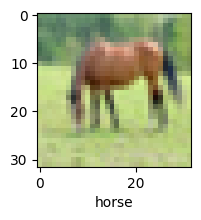

In [ ]:
index = 60
plot_sample(X_test, y_test, index)


In [ ]:
classes[y_classes[index]]


'horse'